# Statistics (Part 3): 

In [3]:
%matplotlib notebook
import numpy as np 
import scipy.stats as sts
import scipy.linalg as LA
import matplotlib.pyplot as plt

# Demo 1: correlation coefficients

In [4]:
agedepth = np.loadtxt('agedepth.txt')

age   = agedepth[:,0]
depth = agedepth[:,1]

<IPython.core.display.Javascript object>


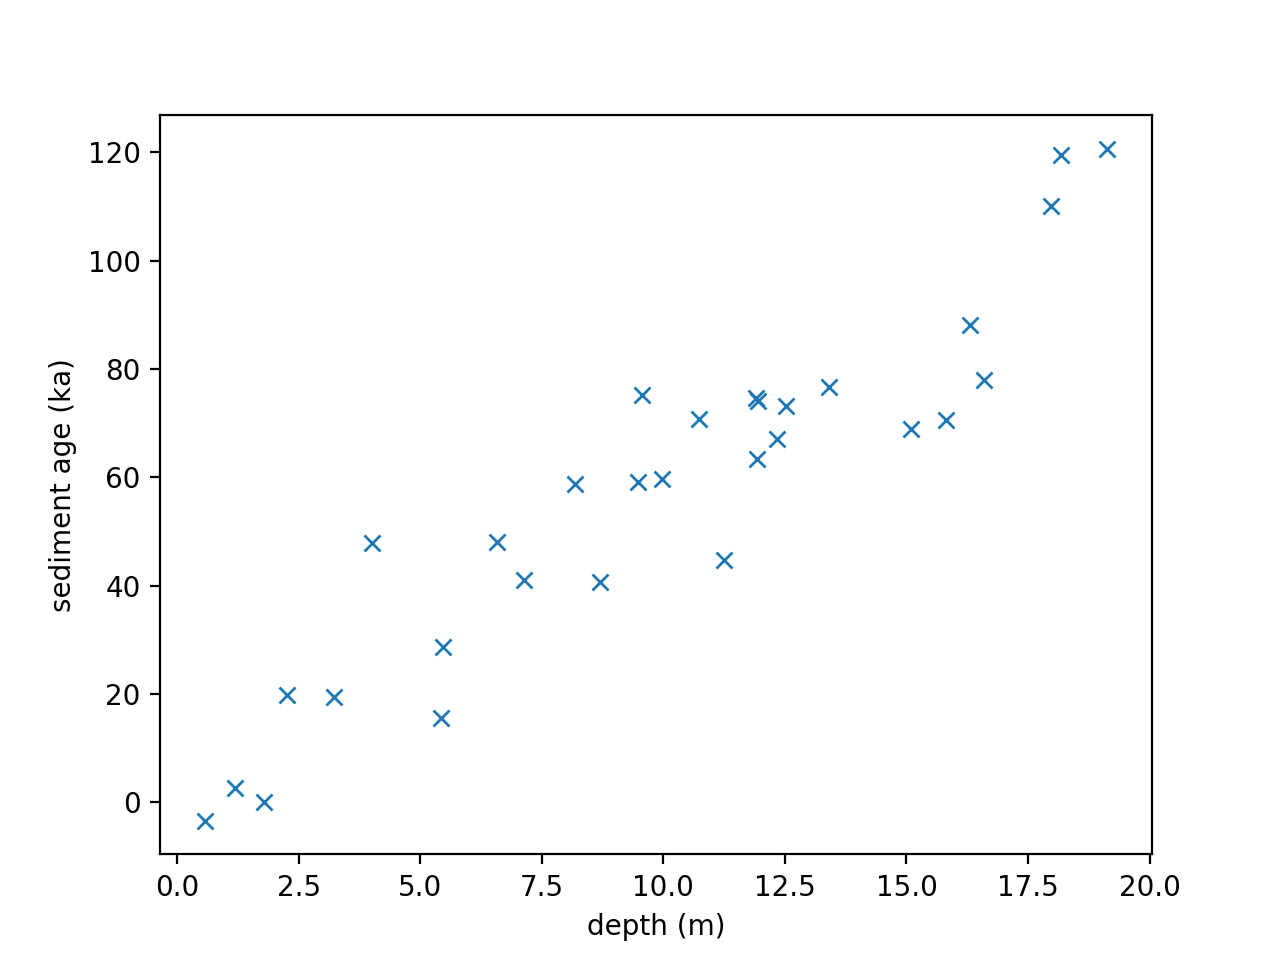

Text(0, 0.5, 'sediment age (ka)')

In [5]:
plt.plot(age,depth,'x')
plt.xlabel('depth (m)')
plt.ylabel('sediment age (ka)')

In [6]:
dmean = np.mean(depth)
amean = np.mean(age)

In [7]:
dstd = np.std(depth)
astd = np.std(age)

In [8]:
N = age.shape[0]

In [9]:
r_da = (1/(N))*(1/dstd)*(1/astd)*np.sum( (depth - dmean)*(age - amean) ) 
print(r_da)

0.9341735768636008


In [10]:
np.corrcoef(age,depth)

array([[1.        , 0.93417358],
       [0.93417358, 1.        ]])

In [11]:
# Random data
depth = np.random.randn(N)
age  = np.random.randn(N)

In [12]:
# Introduce outliers:
depth[-1] = 20
age[-1]   = 20

Demonstrate method for dealing with outliers: calculate statistic  with subset of data

In [19]:
f = 0.85                                    # fraction of samples to include
k = np.round(f*N).astype(int)               # integer number of indices to exclude
N_random_indices = np.random.permutation(N) # generate random permutation of N indices
k_random_indices = N_random_indices[1:k]    # select first k random indices

In [20]:
np.corrcoef(age[k_random_indices],depth[k_random_indices])

array([[1.       , 0.9229104],
       [0.9229104, 1.       ]])

Repeat the above example in a loop: 

In [21]:
f = 0.85                                    # fraction of samples to include
k = np.round(f*N).astype(int)               # integer number of indices to exclude

<IPython.core.display.Javascript object>


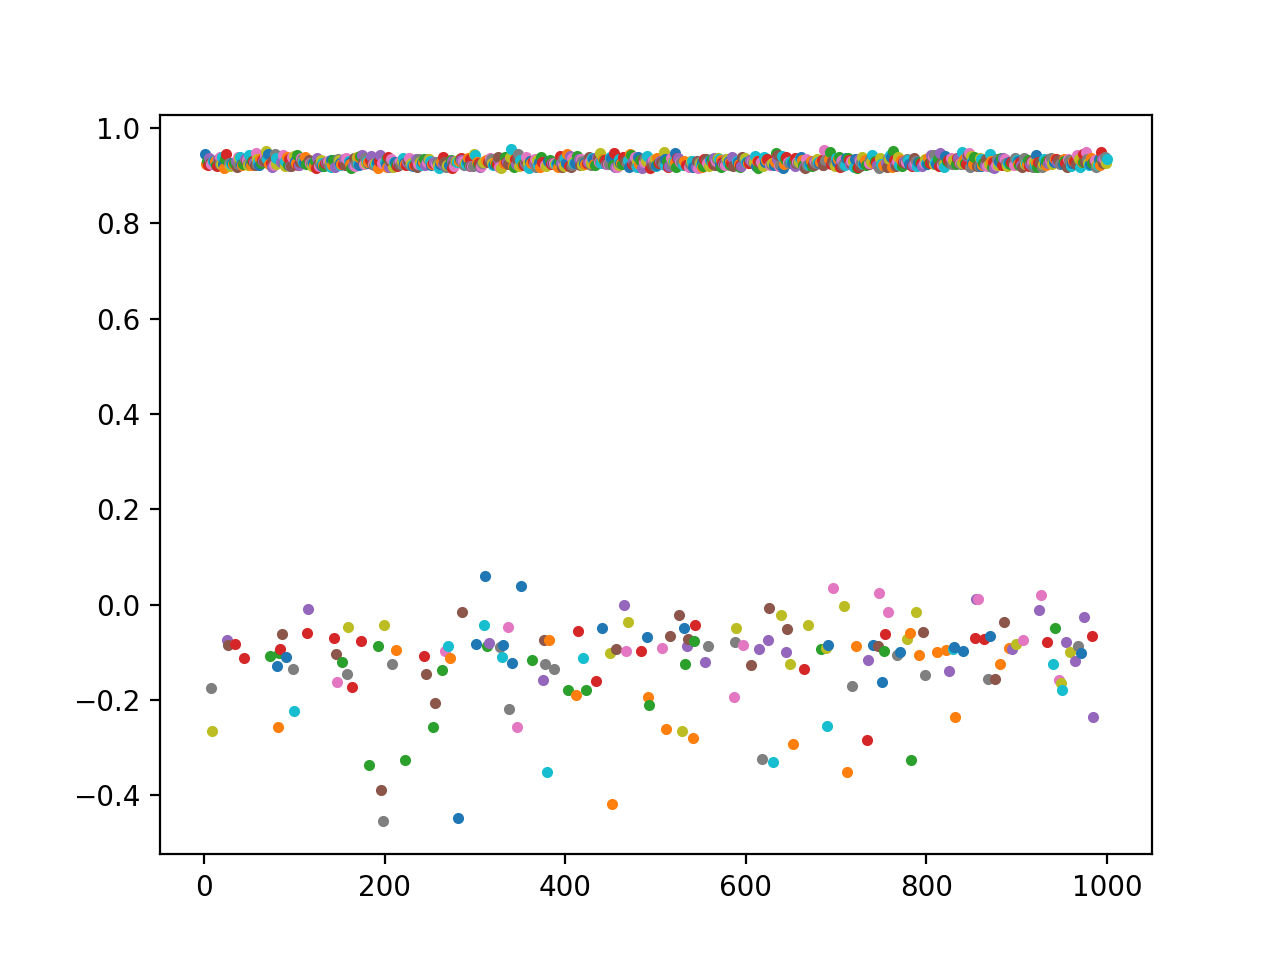

In [22]:
fig, ax = plt.subplots()

for i in range(1,1001):
    N_random_indices = np.random.permutation(N)
    k_random_indices = N_random_indices[1:k]
    r_da_random      = np.corrcoef(age[k_random_indices],depth[k_random_indices])
    
    ax.plot(i,r_da_random[0,1],'.')

# Demo 2: linear regression 
back to age-depth data!

In [23]:
agedepth = np.loadtxt('agedepth.txt')

depth = agedepth[:,0]
age   = agedepth[:,1]

<IPython.core.display.Javascript object>


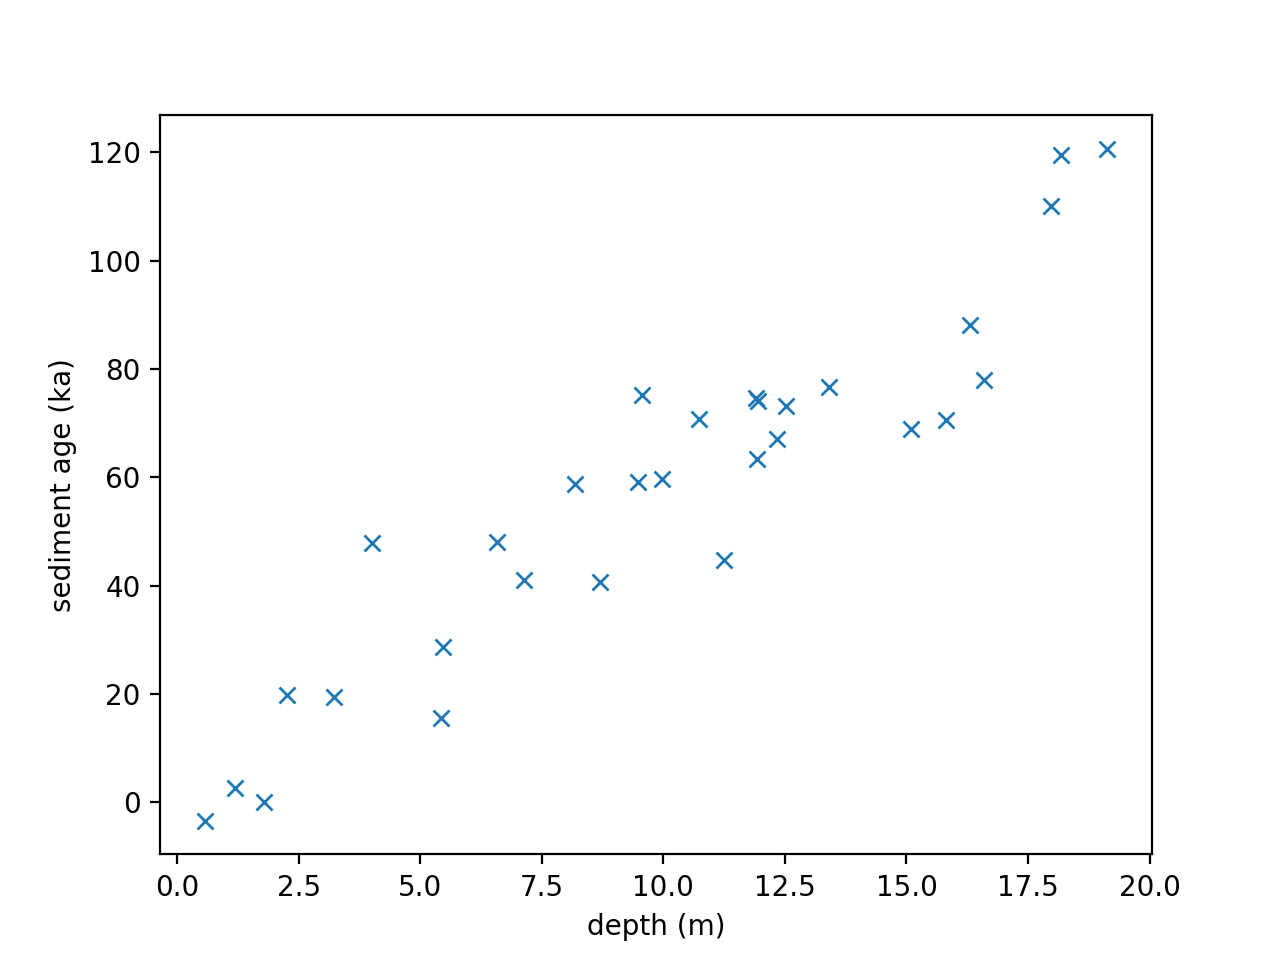

Text(0.5, 0, 'depth (m)')

In [24]:
fig, ax = plt.subplots()
ax.plot(depth,age, 'x')
ax.set_ylabel('sediment age (ka)')
ax.set_xlabel('depth (m)')

In [29]:
dmean = depth.mean()
amean = age.mean()

In [30]:
dstd = depth.std()
astd = age.std()

N = age.shape[0]

In [31]:
# Calculate coefficients by hand:
b1 = np.sum( (depth - dmean)*(age - amean) )/ np.sum((depth - dmean)**2)
b0 = amean - b1*dmean

# use numpys 'polyfit'
p = np.polyfit(depth,age,1)

<IPython.core.display.Javascript object>


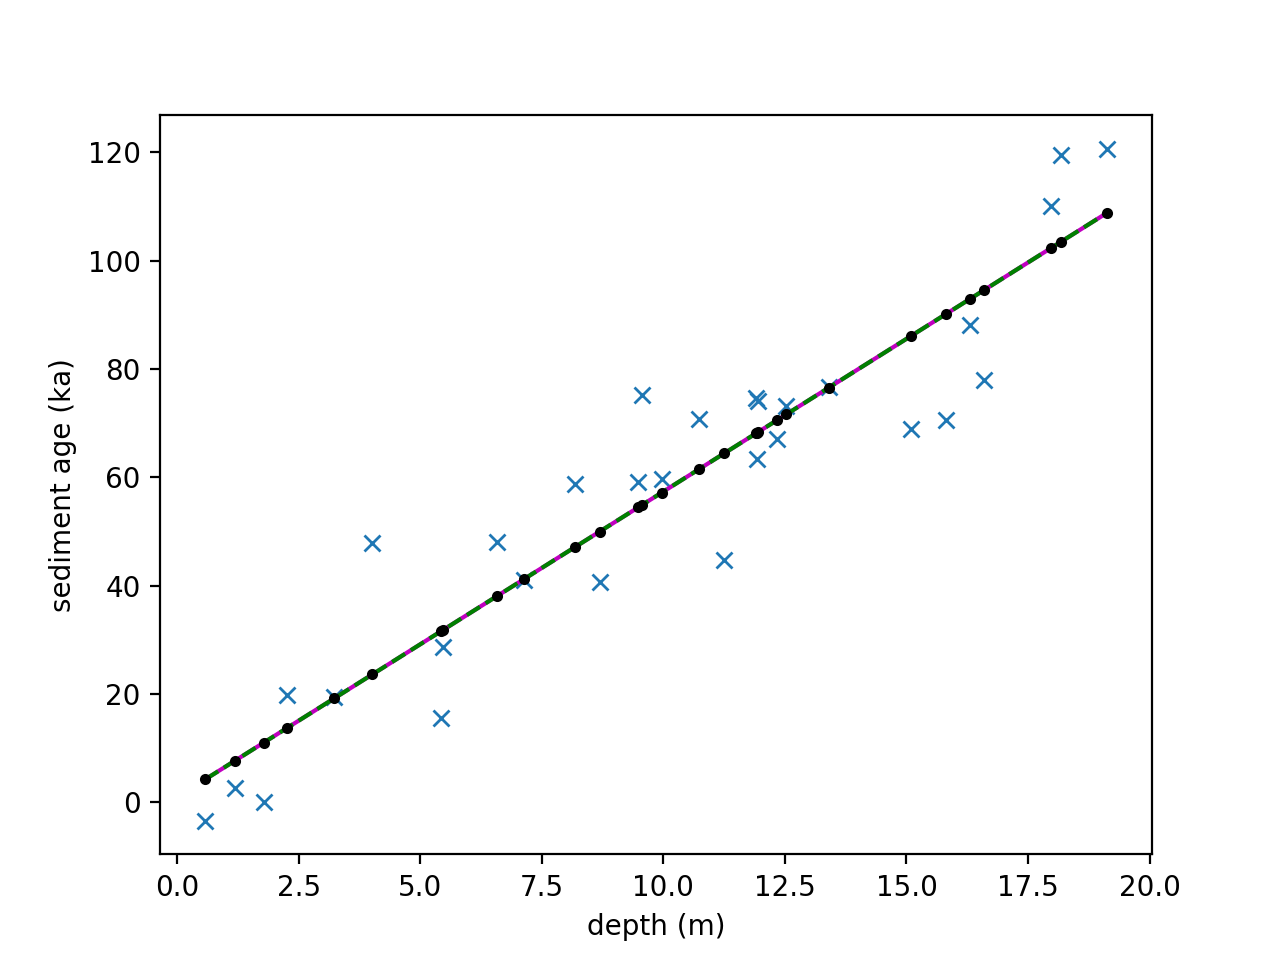

Text(0.5, 0, 'depth (m)')

In [32]:
fig, ax = plt.subplots()
ax.plot(depth,age, 'x')
ax.plot(depth, b1*depth + b0,      'm')
ax.plot(depth, p[0]*depth + p[1],'--g')
ax.plot(depth, np.polyval(p,depth), 'k.')

ax.set_ylabel('sediment age (ka)')
ax.set_xlabel('depth (m)')


### (a) Formation and solution of the normal equation  

$$ 
A^*Ax = A^*b\\
x = (A^*A)^{-1}A^*b
$$

In [33]:
A   = np.vstack([depth**i for i in range(0,2)]).T
x_a = LA.inv(A.T @ A) @ np.dot(A.T,age)

SVD

In [34]:
U, S, Vh = LA.svd(A)
V = Vh.T
x_f = V @ LA.pinv(LA.diagsvd(S,depth.shape[0],2)) @ np.dot(U.T,age)

# Demo 3: Analysis of Variance 

In [35]:
x = depth.copy() 
y = age.copy()
yhat = b0 + b1*depth

<IPython.core.display.Javascript object>


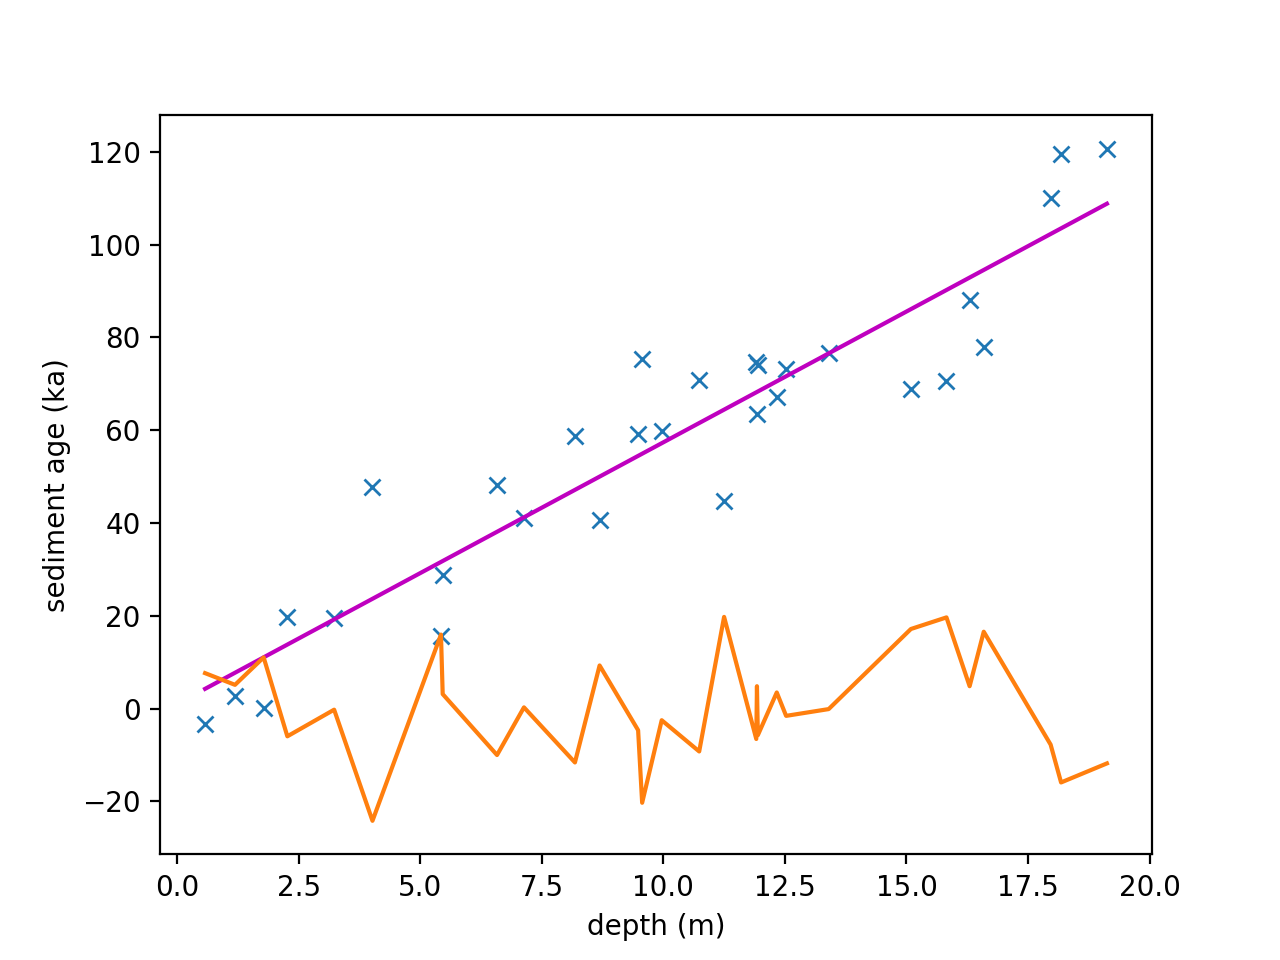

Text(0.5, 0, 'depth (m)')

In [36]:
fig, ax = plt.subplots()
ax.plot(x,y, 'x')
ax.plot(x, yhat,      'm')

ax.set_ylabel('sediment age (ka)')
ax.set_xlabel('depth (m)')

In [37]:
plt.plot(x,yhat-y)

<IPython.core.display.Javascript object>


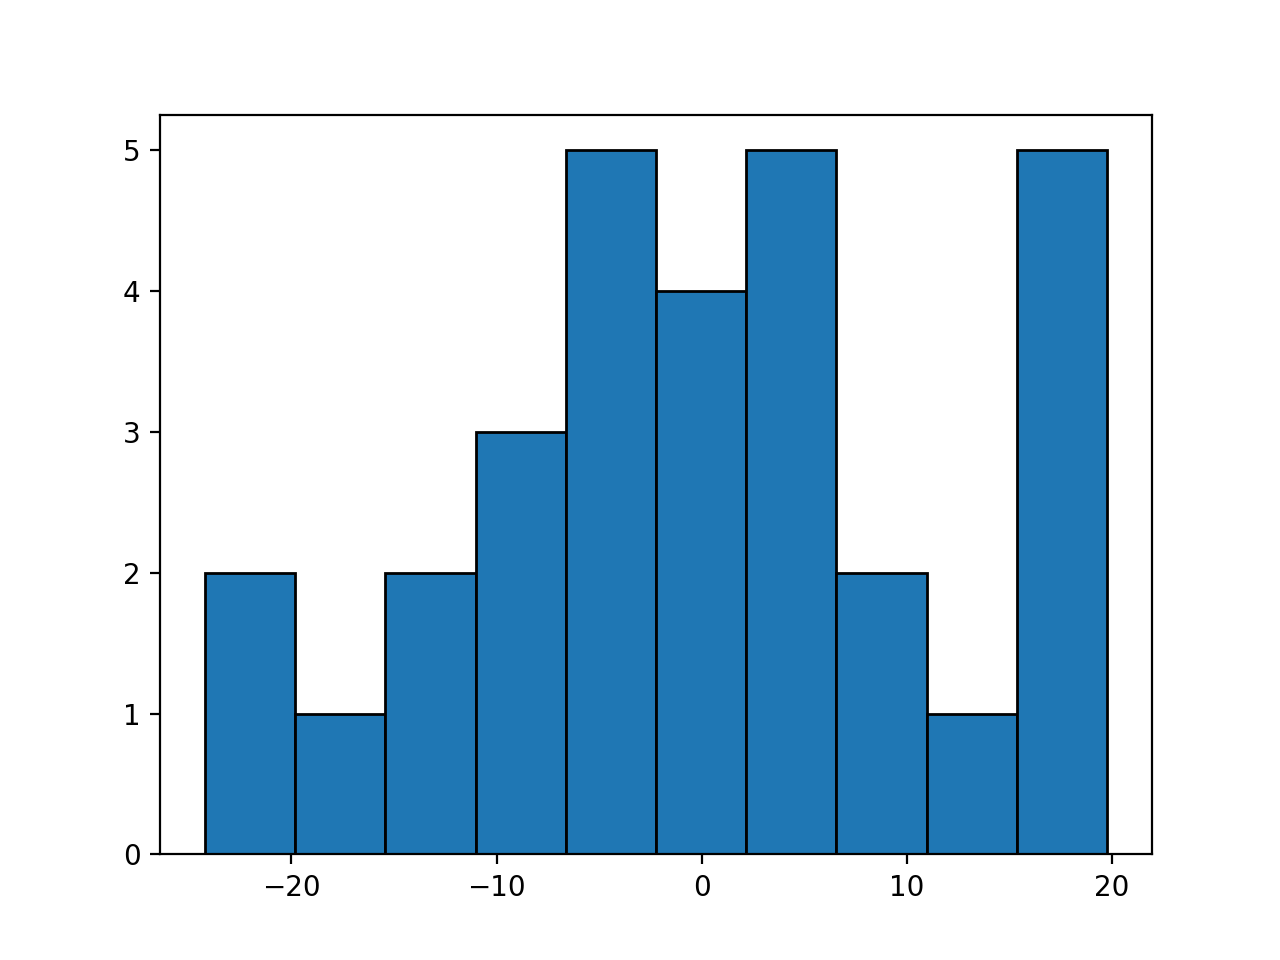

(array([2., 1., 2., 3., 5., 4., 5., 2., 1., 5.]),
 array([-24.20964588, -19.81324587, -15.41684586, -11.02044584,
         -6.62404583,  -2.22764582,   2.1687542 ,   6.56515421,
         10.96155422,  15.35795424,  19.75435425]),
 <a list of 10 Patch objects>)

In [38]:
fig, ax = plt.subplots()
ax.hist(yhat- y,edgecolor='k')

In [40]:
#Sum of squares:  
SSE = np.sum((yhat - y)**2)
print('SSE     : {:.3f}'.format(SSE))

SST = np.sum(y**2) - (1/N)*(np.sum(y))**2
print('SST     : {:.3f}'.format(SST))

SSR = np.sum(yhat**2) - (1/N)*(np.sum(yhat))**2
print('SSR     : {:.3f}'.format(SSR))

print('SST-SSR : {:.3f}'.format(SST-SSR))

SSE     : 3876.149
SST     : 30444.217
SSR     : 26568.067
SST-SSR : 3876.149


In [41]:
# Mean squares:
MSR = SSR/1
print('MSR     : {:.3f}'.format(MSR))

MSE = SSE/(N-2)
print('MSE     : {:.3f}'.format(MSE))

MSR     : 26568.067
MSE     : 138.434


In [42]:
#Show that SST/(N-1) is the same as the variance of y:
print(SST/(N))
print(y.var())

1014.8072221653991
1014.8072221654004


In [43]:
# Test significance of fit with F-test: (is it better than the mean?)
F = MSR/MSE
print('Fobs  = {:.3f}'.format(F))

alpha = 0.05
Fcrit = sts.f.isf(alpha,1,N-2)

print('Fcrit = {:.3f}'.format(Fcrit))

Fobs  = 191.919
Fcrit = 4.196


In [44]:
# Multiple correlation coefficient:
Rsquared = SSR/SST  
print('R^2 = {:.3f}'.format(Rsquared))

R = np.sqrt(Rsquared)
  
print('R   = {:.3f}'.format(R))


# Demonstrate that this is the same as previous correlation coefficient
r = (1/(N))*(1/np.std(y))*(1/np.std(yhat))*sum( (yhat - np.mean(yhat)) *(y - np.mean(y)) )

print('r   = {:.3f}'.format(r))

R^2 = 0.873
R   = 0.934
r   = 0.934


# Demo 4: Cross validation

<IPython.core.display.Javascript object>


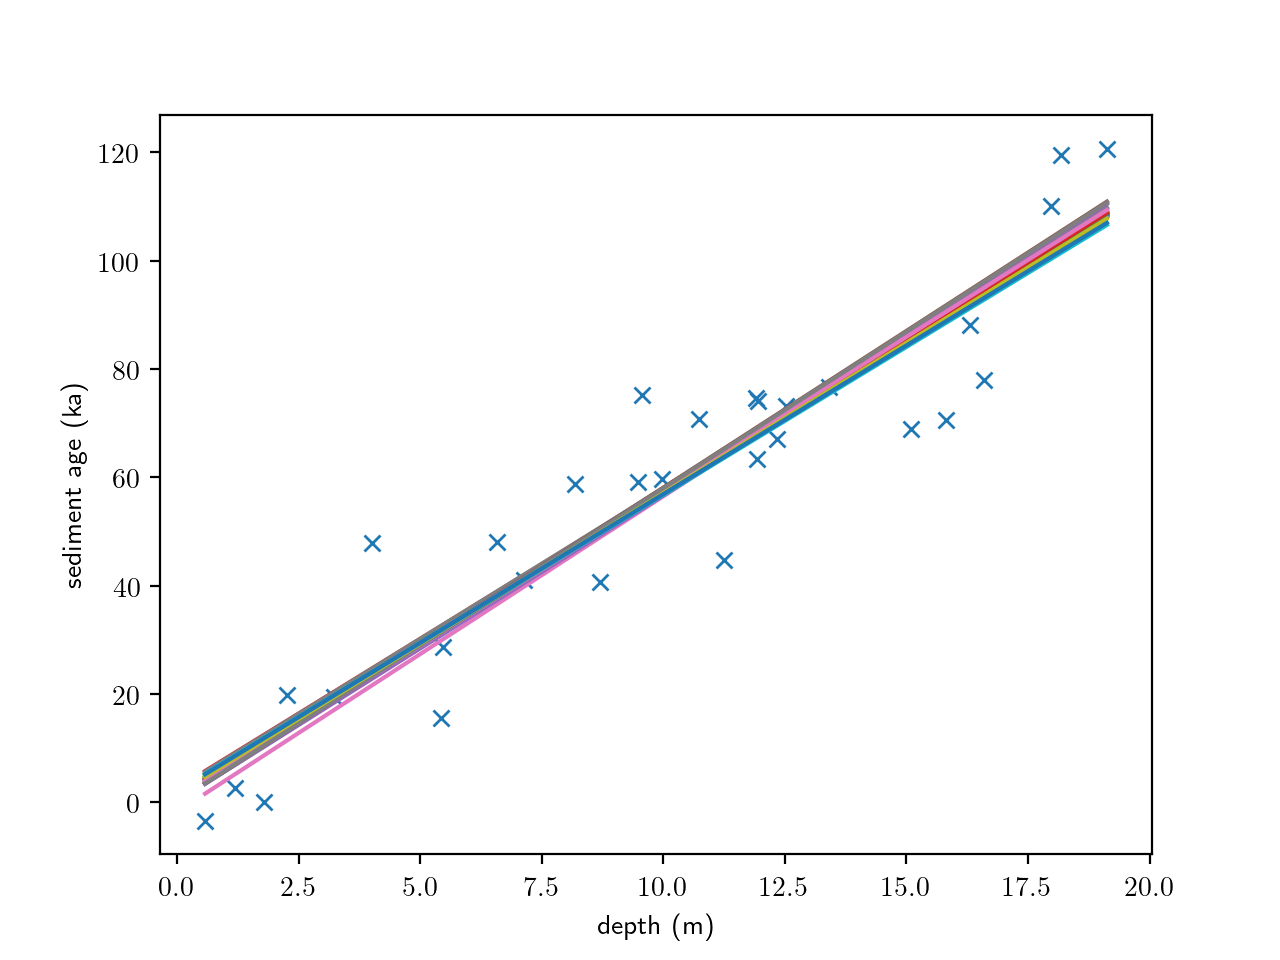

In [46]:
fig, ax = plt.subplots()
ax.plot(depth,age, 'x')
ax.set_ylabel('sediment age (ka)')
ax.set_xlabel('depth (m)')

coefs   = np.zeros((N,2))
p_age   = np.zeros(N)
p_error = np.zeros(N)
for i in range(N):
    j_depth = depth.copy()
    j_age   = age.copy()
    j_depth = np.delete(j_depth,i)
    j_age   = np.delete(j_age,i)
    coefs[i,:] = np.polyfit(j_depth,j_age,1)
    ax.plot(depth,np.polyval(coefs[i,:],depth))
    
    p_age[i]   = np.polyval(coefs[i,:],depth[i])
    p_error[i] = p_age[i] - age[i]

# Demo 5: Reduced major axis regression 

In [47]:
p = np.polyfit(depth,age,1)

b1_RMA = astd/dstd
b0_RMA = amean - b1*dmean

<IPython.core.display.Javascript object>


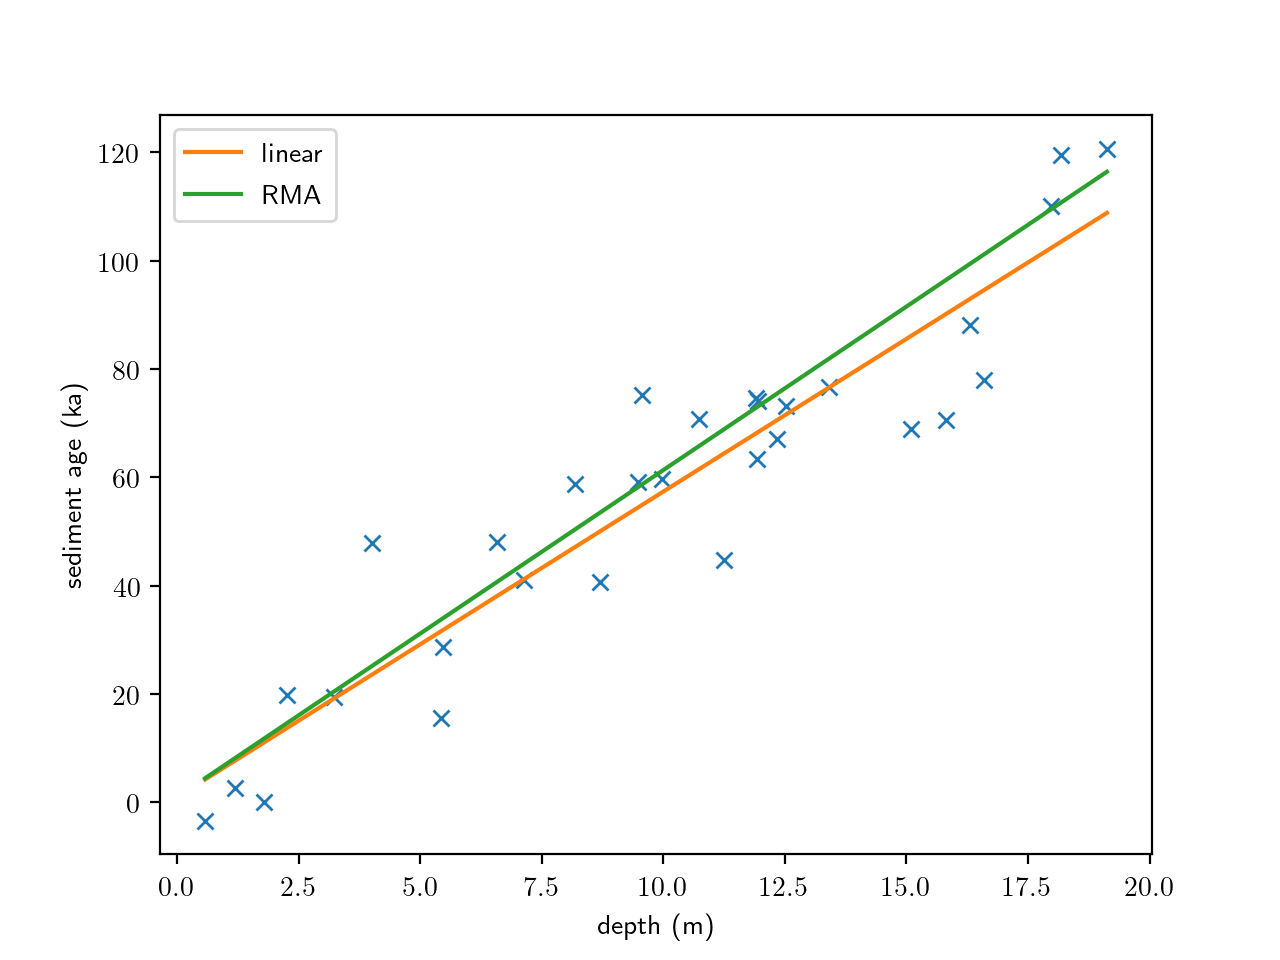

In [48]:
fig, ax = plt.subplots()
ax.plot(depth,age, 'x')

ax.plot(depth,np.polyval(p,depth), label='linear')

ax.plot(depth,b0_RMA + b1_RMA*depth, label='RMA')

ax.set_ylabel('sediment age (ka)')
ax.set_xlabel('depth (m)')

ax.legend()

# Demo 6: Polynomial regression

<IPython.core.display.Javascript object>


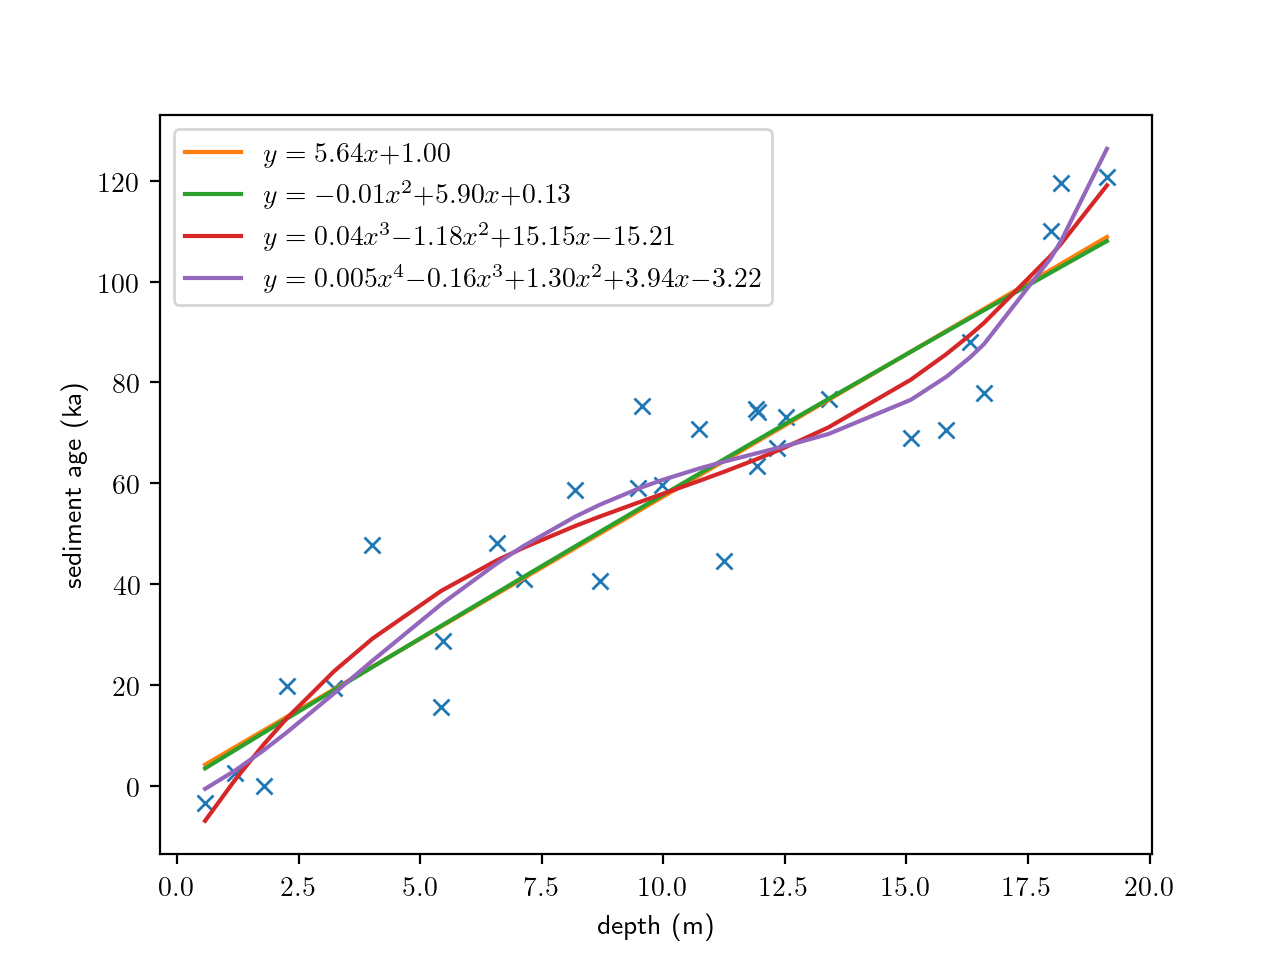

In [45]:
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots()
ax.plot(depth,age, 'x')

p = np.polyfit(depth,age,1)
ax.plot(depth,np.polyval(p,depth), label='$y = {{{:.2f}}}x {{{:+.2f}}}$'.format(*p))

p = np.polyfit(depth,age,2)
ax.plot(depth,np.polyval(p,depth), label='$y = {{{:.2f}}}x^2 {{{:+.2f}}}x {{{:+.2f}}}$'.format(*p))

p = np.polyfit(depth,age,3)
ax.plot(depth,np.polyval(p,depth), label='$y = {{{:.2f}}}x^3 {{{:+.2f}}}x^2 {{{:+.2f}}}x {{{:+.2f}}}$'.format(*p))

p = np.polyfit(depth,age,4)
ax.plot(depth,np.polyval(p,depth), label='$y = {{{:.3f}}}x^4 {{{:+.2f}}}x^3 {{{:+.2f}}}x^2 {{{:+.2f}}}x {{{:+.2f}}}$'.format(*p))

ax.set_ylabel('sediment age (ka)')
ax.set_xlabel('depth (m)')

ax.legend()